In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# personalized kernel
kernel = [[ -0.8],
          [ 2.0],
          [ -0.8]]
kernel = np.array(kernel)
print kernel.shape

(3, 1)


(81, 81)


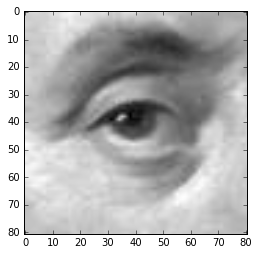

In [10]:
img = cv2.imread('eye.jpg', 0)
print img.shape
plt.imshow(img, cmap='gray')
plt.show()

In [11]:
def add_padding(matrix, kernel, pad):
    r, c = kernel.shape
    if c == 3:
        for p in range(pad):
            col_zeros = np.array([0]*matrix.shape[0])
            matrix = np.c_[col_zeros, matrix, col_zeros]
    if r == 3:
        for p in range(pad):
            row_zeros = np.array([0]*matrix.shape[1])
            matrix = np.r_[[row_zeros], matrix, [row_zeros]]
    return matrix

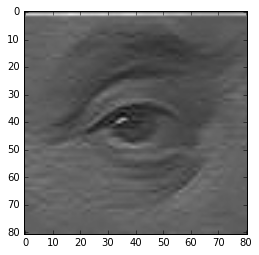

In [30]:
def register(matrix, kernel, r, c):
    kr, kc = kernel.shape
    init_r = (kr-1)/2
    init_c = (kc-1)/2
    reg = matrix[r-init_r:(r+init_r)+1,c-init_c:(c+init_c)+1]
    return reg

def correlation(image, kernel):
    mout = np.zeros(image.shape)
    kr, kc = kernel.shape
    pad = (kr-1)/2
    imgpad = add_padding(image, kernel, pad)
    
    nr, nc = 0, 0
    for (r,c), value in np.ndenumerate(imgpad):
        if r >= pad and r <= image.shape[1] - pad:
            reg = register(imgpad, kernel, r, c)
            mout[r][c] = np.sum(reg*kernel)
    return mout

            
matout = correlation(img, kernel)
plt.imshow(matout, cmap='gray')
plt.show()